In [54]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
#tree

In [56]:
data = pd.read_csv("crimes_count.csv")
data

,Date,Count,Violent,Arrest,Domestic,ABANDONED BUILDING,APARTMENT,COMMERCIAL / BUSINESS OFFICE,CONVENIENCE STORE,CTA PLATFORM,...,25,26,27,29,28,NA.y,24,76,44,19
0,2010-01-01,74,25,16,16,1,19,2,1,1,...,1,17,23,6,0,0,0,0,0,0
1,2010-01-02,51,17,22,3,0,12,0,0,0,...,5,11,12,5,0,0,0,0,0,0
2,2010-01-03,44,18,15,13,0,16,0,1,0,...,2,17,7,1,1,0,0,0,0,0
3,2010-01-04,52,16,21,5,2,7,0,0,0,...,4,15,13,6,0,1,0,0,0,0
4,2010-01-05,52,13,29,8,2,5,0,0,1,...,3,14,7,10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,2024-02-20,42,16,17,9,0,7,0,1,0,...,5,15,7,2,4,0,0,0,0,0
5164,2024-02-21,35,16,9,8,0,12,2,0,1,...,2,6,10,4,1,0,0,0,0,0
5165,2024-02-22,33,10,16,4,0,6,2,0,0,...,6,9,4,3,1,0,0,0,0,0
5166,2024-02-23,28,6,9,5,1,6,1,0,0,...,2,12,5,2,0,0,0,0,0,0


In [57]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfYear'] = data['Date'].dt.dayofyear
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['IsWeekend'] = data['Date'].dt.weekday >= 5
data['Date'] =data['Year'] + (data['Month'] - 0.5)/12

In [58]:
numeric_columns = data.select_dtypes(include=['float', 'int']).columns

for column in numeric_columns:
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)

In [59]:
data_train = data
categorical_features = ['Arrest', 'Domestic', 'Count']

# Generate numeric features excluding categorical and high cardinality features, price, and Id
numeric_features = [col for col in data_train.columns 
                    if col not in categorical_features 
                    and col not in ['Violent']]

# Select features and target variable
selected_features = numeric_features
X = data_train[selected_features]
y = data_train['Violent']

In [60]:
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Map feature names to their respective importances
feature_importance_map = dict(zip(X.columns, feature_importances))

# Sort the features by importance
sorted_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)

# Extract top 10 features
top_features = sorted_features[:25]

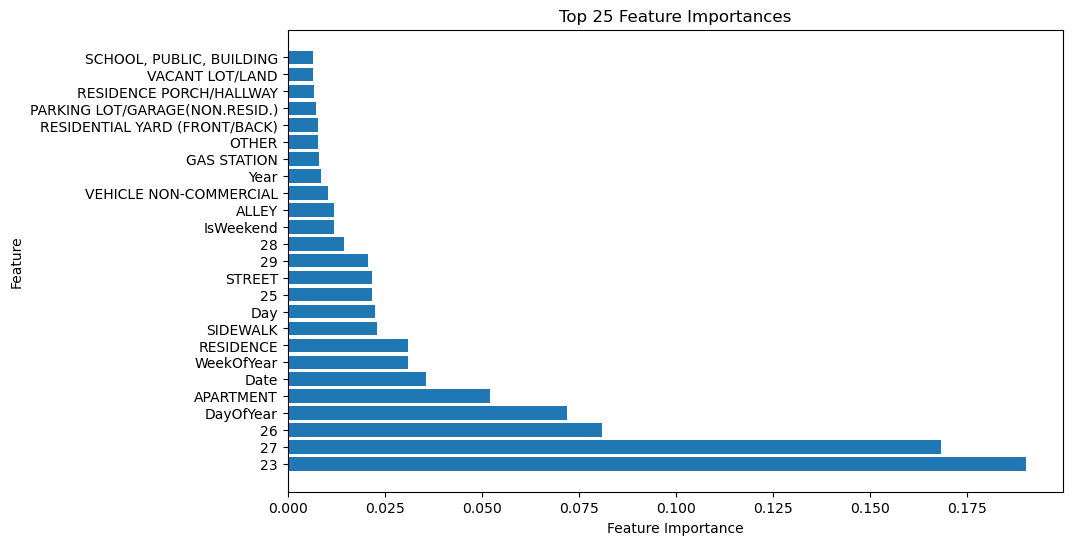

In [61]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), [val[1] for val in top_features], align='center')
plt.yticks(range(len(top_features)), [val[0] for val in top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 25 Feature Importances')
plt.show()

In [62]:
top_feature_names = [feature[0] for feature in top_features]
top_feature_names

['23',
 '27',
 '26',
 'DayOfYear',
 'APARTMENT',
 'Date',
 'WeekOfYear',
 'RESIDENCE',
 'SIDEWALK',
 'Day',
 '25',
 'STREET',
 '29',
 '28',
 'IsWeekend',
 'ALLEY',
 'VEHICLE NON-COMMERCIAL',
 'Year',
 'GAS STATION',
 'OTHER',
 'RESIDENTIAL YARD (FRONT/BACK)',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'RESIDENCE PORCH/HALLWAY',
 'VACANT LOT/LAND',
 'SCHOOL, PUBLIC, BUILDING']